In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

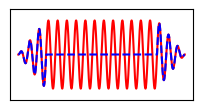

In [2]:
# Directory path
dir_path = '../../paper/Figure 1/'

# Full path for saving the file
save_path = os.path.join(dir_path, 'tacs_generate.svg')

# Parameters
duration = 60  # total duration in seconds
fade_in_out_duration = 10  # fade in and fade out duration in seconds
frequency = 0.3  # frequency in Hz for the real tACS
peak_to_peak_current = 1.5  # peak-to-peak current in mA for the real tACS
sampling_rate = 1000  # sampling rate in Hz
fade_in_out_duration_sham = 5  # ramp up and ramp down duration in seconds
peak_to_peak_current_sham = 0.6  # peak-to-peak current in mA for the sham tACS

# Time array
time = np.linspace(0, duration, int(duration * sampling_rate))

# Creating fade in and fade out window
window = np.ones_like(time)
window[:int(fade_in_out_duration * sampling_rate)] = np.linspace(0, 1, int(fade_in_out_duration * sampling_rate))
window[-int(fade_in_out_duration * sampling_rate):] = np.linspace(1, 0, int(fade_in_out_duration * sampling_rate))

# Real tACS waveform
real_tacs = 0.5 * peak_to_peak_current * np.sin(2 * np.pi * frequency * time) * window

# Sham tACS waveform
sham_tacs = np.zeros_like(time)
sham_tacs[:int(fade_in_out_duration * sampling_rate)] = real_tacs[:int(fade_in_out_duration * sampling_rate)]
sham_tacs[-int(fade_in_out_duration * sampling_rate):] = real_tacs[-int(fade_in_out_duration * sampling_rate):]

# Plotting
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6*cm, 3*cm))
plt.ylim(-1, 1)
plt.yticks([])
plt.xticks([])
plt.plot(time, real_tacs, color='red', label='Real tACS')
plt.plot(time, sham_tacs, color='blue', linestyle='--', label='Sham tACS')

# plt.title('tACS Waveform: Real vs Sham')
# plt.xlabel('Time (s)')
# plt.ylabel('Current (mA)')
# plt.legend()
plt.grid(False)
matplotlib.rcParams.update({'font.size': 7})
# Saving the figure
plt.savefig(save_path, format='svg')

plt.show()

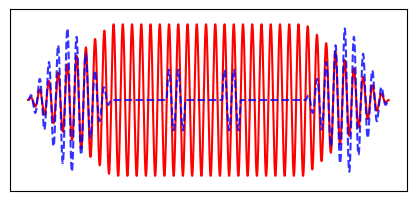

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Directory path
dir_path = '../../paper/Figure 1/'

# Full path for saving the file
save_path = os.path.join(dir_path, 'tacs_generate.svg')

# Parameters
duration = 130  # total duration in seconds
fade_in_out_duration = 30  # fade in and fade out duration in seconds
frequency = 0.3  # frequency in Hz for the real tACS
peak_to_peak_current = 1.5  # peak-to-peak current in mA for the real tACS
sampling_rate = 1000  # sampling rate in Hz
fade_in_out_duration_sham = 15  # ramp up and ramp down duration in seconds
peak_to_peak_current_sham = 0.6  # peak-to-peak current in mA for the sham tACS

# Time array
time = np.linspace(0, duration, int(duration * sampling_rate))

# Creating fade in and fade out window
window = np.ones_like(time)
window[:int(fade_in_out_duration * sampling_rate)] = np.linspace(0, 1, int(fade_in_out_duration * sampling_rate))
window[-int(fade_in_out_duration * sampling_rate):] = np.linspace(1, 0, int(fade_in_out_duration * sampling_rate))

# Real tACS waveform
real_tacs = 0.5 * peak_to_peak_current * np.sin(2 * np.pi * frequency * time) * window

# Sham tACS waveform
sham_tacs = np.zeros_like(time)
ramp_up = np.linspace(0, 1, int(fade_in_out_duration_sham * sampling_rate))
ramp_down = np.linspace(1, 0, int(fade_in_out_duration_sham * sampling_rate))
ramp_time = np.linspace(0, fade_in_out_duration, int(fade_in_out_duration * sampling_rate))
sham_ramp = peak_to_peak_current/2 * np.sin(2 * np.pi * frequency * ramp_time)
sham_ramp[:int(fade_in_out_duration_sham * sampling_rate)] = ramp_up * sham_ramp[:int(fade_in_out_duration_sham * sampling_rate)]
sham_ramp[-int(fade_in_out_duration_sham * sampling_rate):] = ramp_down * sham_ramp[-int(fade_in_out_duration_sham * sampling_rate):]
sham_tacs[:int(fade_in_out_duration * sampling_rate)] = sham_ramp
sham_tacs[-int(fade_in_out_duration * sampling_rate):] = sham_ramp

# Adding bursts in sham stimulation
burst_duration = int(2 / frequency * sampling_rate)  # 2 cycles per burst
burst_start1 = int(50 * sampling_rate)  # starting time of the first burst
burst_start2 = int(70 * sampling_rate)  # starting time of the second burst

for start in [burst_start1, burst_start2]:
    sham_tacs[start:start + burst_duration] = 0.5 * peak_to_peak_current_sham * np.sin(2 * np.pi * frequency * time[start:start + burst_duration])

# Plotting
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(13*cm, 6*cm))
plt.ylim(-0.9, 0.9)
plt.yticks([])
plt.xticks([])
plt.plot(time, real_tacs, color='red', label='Real tACS')
plt.plot(time, sham_tacs, color='blue', linestyle='--', label='Sham tACS', alpha=0.8)

# plt.title('tACS Waveform: Real vs Sham')
# plt.xlabel('Time (s)')
# plt.ylabel('Current (mA)')
# plt.legend()
plt.grid(False)
matplotlib.rcParams.update({'font.size': 7})
# Saving the figure
plt.savefig(save_path, format='svg')

plt.show()